<a href="https://colab.research.google.com/github/Praneshss/PUF_Tutorial/blob/main/Modeling_attack_on_APUF_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modeling Attack on 4-bit APUF: Step-by-Step Tutorial**

Demonstrated during talk organized by IIEST Shibpur, India

Let's say CRP (challenge-response) table of a 4-bit APUF instance is given by:


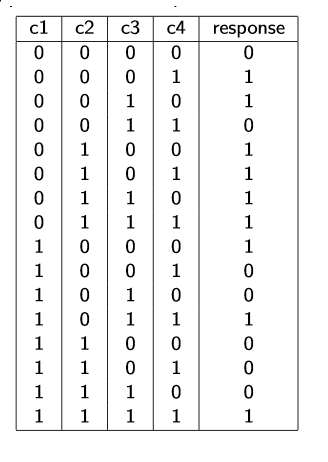

In [ ]:
import numpy as np

In [ ]:
challenges=np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
            [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], 
            [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], 
            [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])
print("Challenges:",challenges)
responses=np.array([0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1])
print("Responses:",responses)

Challenges: [[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]
Responses: [0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1]


**Challenges are converted to parity vectors (Φ)**

In [ ]:
def get_parity_vectors(C):
  n=C.shape[1]
  m=C.shape[0]
  C[C==0]=-1
  parityVec=np.zeros((m,n+1))
  parityVec[:,0:1]=np.ones((m,1))
  for i in range(2,n+2):
      parityVec[:,i-1:i]=np.prod(C[:,0:i-1],axis=1).reshape((m,1))
  return parityVec

In [ ]:
features=get_parity_vectors(challenges)
print(features)

[[ 1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1.  1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.]
 [ 1.  1.  1.  1.  1.]]


In [ ]:
responses[responses==0]=-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, responses, test_size = 0.2, random_state = 42)
lin_svc = svm.LinearSVC(C=1.0).fit(train_features, train_labels)

In [ ]:
for (intercept, coef) in zip(lin_svc.intercept_, lin_svc.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * \u03A6[{1}]".format(c, i)

    print(s)


y = 0.097 + 0.097 * Φ[0] + -0.283 * Φ[1] + -0.282 * Φ[2] + 0.189 * Φ[3] + -0.419 * Φ[4]
